In [154]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from scipy.io import arff
from sklearn import preprocessing
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

Data using import from website api

In [155]:
#from ucimlrepo import fetch_ucirepo 
#import pandas as pd
#from scipy.io import arff
#
#polish_companies_bankruptcy = fetch_ucirepo(id=365) 
#X: pd.DataFrame
#y: pd.DataFrame
#
#
##data (as pandas dataframes) 
#X = polish_companies_bankruptcy.data.features 
#y = polish_companies_bankruptcy.data.targets
#
#print(polish_companies_bankruptcy.metadata) 
## variable information 
#print(polish_companies_bankruptcy.variables) 
#
#print("Data:")
#
#print("Features")
#X
#print("Targets")
#y

Data using downloaded files

In [156]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from scipy.io import arff
 
X: pd.DataFrame
y: pd.DataFrame

arff_file_year_5 = arff.loadarff('PolishBankruptcy/5year.arff')

df = pd.DataFrame(arff_file_year_5[0])
print("data frame")
df
#for value in df["class"]:
#    if value == b'0':
#    df["class"]
for i in range(len(df)):
    if df.loc[i, 'class'] == b'0':
        df.loc[i, 'class'] = 0.0
    else:
        df.loc[i, 'class'] = 1.0

df

data frame


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.5200,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.25970,0.0
1,-0.006202,0.48465,0.232980,1.59980,6.1825,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.37000,0.0
2,0.130240,0.22142,0.577510,3.60820,120.0400,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.61880,0.0
3,-0.089951,0.88700,0.269270,1.52220,-55.9920,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.92990,0.0
4,0.048179,0.55041,0.107650,1.24370,-22.9590,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.36220,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.9070,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,1.0
5906,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,4.4940,5.13050,1.0
5907,-0.179050,1.25530,-0.275990,0.74554,-120.4400,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,1.7559,9.95270,1.0
5908,-0.108860,0.74394,0.015449,1.08780,-17.0030,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,4.3911,0.95575,1.0


Standardizing Data

In [157]:
data = df.dropna()
#print("describe data")
#data.describe()
#print("data")
data
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_transposed = data_scaled.transpose()
print(data)
#print(data_scaled_transposed)

attribute_names = [
    "X1:net profit / total assets",
    "X2:total liabilities / total assets",
    "X3:working capital / total assets",
    "X4:current assets / short-term liabilities",
    "X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "X6:retained earnings / total assets",
    "X7:EBIT / total assets",
    "X8:book value of equity / total liabilities",
    "X9:sales / total assets",
    "X10:equity / total assets",
    "X11:(gross profit + extraordinary items + financial expenses) / total assets",
    "X12:gross profit / short-term liabilities",
    "X13:(gross profit + depreciation) / sales",
    "X14:(gross profit + interest) / total assets",
    "X15:(total liabilities * 365) / (gross profit + depreciation)",
    "X16:(gross profit + depreciation) / total liabilities",
    "X17:total assets / total liabilities",
    "X18:gross profit / total assets",
    "X19:gross profit / sales",
    "X20:(inventory * 365) / sales",
    "X21:sales (n) / sales (n-1)",
    "X22:profit on operating activities / total assets",
    "X23:net profit / sales",
    "X24:gross profit (in 3 years) / total assets",
    "X25:(equity - share capital) / total assets",
    "X26:(net profit + depreciation) / total liabilities",
    "X27:profit on operating activities / financial expenses",
    "X28:working capital / fixed assets",
    "X29:logarithm of total assets",
    "X30:(total liabilities - cash) / sales",
    "X31:(gross profit + interest) / sales",
    "X32:(current liabilities * 365) / cost of products sold",
    "X33:operating expenses / short-term liabilities",
    "X34:operating expenses / total liabilities",
    "X35:profit on sales / total assets",
    "X36:total sales / total assets",
    "X37:(current assets - inventories) / long-term liabilities",
    "X38:constant capital / total assets",
    "X39:profit on sales / sales",
    "X40:(current assets - inventory - receivables) / short-term liabilities",
    "X41:total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "X42:profit on operating activities / sales",
    "X43:rotation receivables + inventory turnover in days",
    "X44:(receivables * 365) / sales",
    "X45:net profit / inventory",
    "X46:(current assets - inventory) / short-term liabilities",
    "X47:(inventory * 365) / cost of products sold",
    "X48:EBITDA (profit on operating activities - depreciation) / total assets",
    "X49:EBITDA (profit on operating activities - depreciation) / sales",
    "X50:current assets / total liabilities",
    "X51:short-term liabilities / total assets",
    "X52:(short-term liabilities * 365) / cost of products sold)",
    "X53:equity / fixed assets",
    "X54:constant capital / fixed assets",
    "X55:working capital",
    "X56:(sales - cost of products sold) / sales",
    "X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "X58:total costs /total sales",
    "X59:long-term liabilities / equity",
    "X60:sales / inventory",
    "X61:sales / receivables",
    "X62:(short-term liabilities *365) / sales",
    "X63:sales / short-term liabilities",
    "X64:sales / fixed assets",
    "class"
]

attribute_dict = {}

for i in range(len(data_scaled_transposed)):
    attribute_dict[attribute_names[i]] = data_scaled_transposed[i]


standardisedData = pd.DataFrame(attribute_dict)
#PreprocessedData = standardisedData
#PreprocessedData
standardisedData


         Attr1    Attr2     Attr3    Attr4    Attr5     Attr6     Attr7  \
0     0.088238  0.55472  0.011340  1.02050  -66.520  0.342040  0.109490   
4     0.048179  0.55041  0.107650  1.24370  -22.959  0.000000  0.059280   
6     0.099486  0.59991  0.374890  1.65290   19.036  0.210840  0.123950   
7     0.078518  0.20546  0.103930  2.79390   77.784  0.365150  0.093388   
8     0.125040  0.35440  0.314190  2.71270   17.942  0.305750  0.158430   
...        ...      ...       ...      ...      ...       ...       ...   
5873  0.016964  0.75503  0.081574  1.12680 -197.070  0.002708  0.016964   
5874  0.118540  0.51946  0.376420  1.96150  -80.058  0.000000  0.118540   
5892  0.112350  1.73990 -0.514250  0.43445  -82.297 -0.322010  0.112350   
5893 -0.089739  1.33000 -0.314680  0.67454 -124.530 -1.260700 -0.089739   
5905  0.012898  0.70621  0.038857  1.17220  -18.907  0.000000  0.013981   

        Attr8   Attr9   Attr10  ...    Attr56    Attr57   Attr58    Attr59  \
0     0.57752  1.0881

,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X10:equity / total assets,...,X56:(sales - cost of products sold) / sales,X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58:total costs /total sales,X59:long-term liabilities / equity,X60:sales / inventory,X61:sales / receivables,X62:(short-term liabilities *365) / sales,X63:sales / short-term liabilities,X64:sales / fixed assets,class
0,0.006675,0.020298,-0.549991,-0.177912,-0.026821,0.015309,0.023533,-0.436021,-0.212378,-0.037228,...,0.047814,0.056445,-0.063337,-0.061398,-0.060586,-0.168680,0.260014,-0.600041,-0.060357,-0.186612
1,-0.018488,0.019749,-0.191139,-0.141493,0.001511,-0.018198,0.018192,-0.325335,0.098282,-0.016289,...,0.956961,-0.010545,-0.379795,-0.037031,-0.056483,-0.195352,0.006140,-0.425176,-0.059265,-0.186612
2,0.013740,0.026062,0.804600,-0.074725,0.028825,0.002457,0.025071,-0.394679,-0.205756,-0.024309,...,0.091297,0.045787,-0.079589,-0.050342,-0.063188,-0.262796,0.170987,-0.549862,0.242290,-0.186612
3,0.000569,-0.024245,-0.205000,0.111450,0.067035,0.017573,0.021820,1.085581,-0.107515,0.039603,...,0.660574,-0.013864,-0.292251,-0.028822,-0.054666,-0.233976,-0.363210,0.252860,-0.090091,-0.186612
4,0.029792,-0.005250,0.578431,0.098201,0.028113,0.011754,0.028740,0.139460,-0.104604,0.015470,...,0.675798,0.023900,-0.297938,-0.014784,-0.064185,-0.126393,-0.319424,0.109898,-0.071364,-0.186612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,-0.038095,0.045845,-0.288298,-0.160567,-0.111731,-0.017933,0.013690,-0.553075,-0.358066,-0.049443,...,0.741028,-0.025637,0.041929,-0.056773,-0.058150,-0.165322,1.110662,-0.835865,-0.060690,5.358702
3027,0.025709,0.015801,0.810300,-0.024371,-0.035626,-0.018198,0.024496,-0.275270,-0.146884,-0.011274,...,0.310132,0.044995,-0.145683,-0.015762,-0.068236,-0.067293,0.110051,-0.509422,-0.040946,5.358702
3028,0.021821,0.171451,-2.508343,-0.273537,-0.037083,-0.049744,0.023837,-0.899835,1.480498,-0.209015,...,-0.532193,-0.113658,0.025422,-0.260901,-0.052375,0.985693,-0.058324,-0.359948,-0.034938,5.358702
3029,-0.105120,0.119174,-1.764744,-0.234362,-0.064551,-0.141702,0.002338,-0.817851,0.620561,-0.142574,...,0.842352,0.055115,-0.328951,-0.137811,-0.063941,0.279127,0.366930,-0.649658,-0.026667,5.358702


Normalize Data

In [158]:
data
normalizer = preprocessing.Normalizer()
data_normalised = normalizer.fit_transform(data)
data_normalised_transposed = data_normalised.transpose()

normalised_dict = {}

for i in range(len(data_normalised_transposed)):
    normalised_dict[attribute_names[i]] = data_normalised_transposed[i]


normalisedData = pd.DataFrame(normalised_dict)
normalisedData

,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X10:equity / total assets,...,X56:(sales - cost of products sold) / sales,X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58:total costs /total sales,X59:long-term liabilities / equity,X60:sales / inventory,X61:sales / receivables,X62:(short-term liabilities *365) / sales,X63:sales / short-term liabilities,X64:sales / fixed assets,class
0,5.779764e-06,0.000036,7.427925e-07,0.000067,-0.004357,2.240430e-05,7.171812e-06,0.000038,0.000071,0.000021,...,0.000005,0.000018,0.000060,1.325760e-07,0.000476,0.000310,0.009351,0.000167,0.000214,0.000000
1,2.008801e-05,0.000229,4.488416e-05,0.000519,-0.009573,0.000000e+00,2.471652e-05,0.000341,0.000632,0.000187,...,0.000100,0.000045,0.000321,5.811384e-05,0.004219,0.001707,0.044375,0.001430,0.001402,0.000000
2,1.565404e-05,0.000094,5.898863e-05,0.000260,0.002995,3.317550e-05,1.950343e-05,0.000105,0.000173,0.000063,...,0.000014,0.000039,0.000143,1.012448e-05,0.000860,0.000390,0.020459,0.000442,0.004979,0.000000
3,6.082925e-06,0.000016,8.051637e-06,0.000216,0.006026,2.828880e-05,7.234930e-06,0.000300,0.000095,0.000062,...,0.000015,0.000008,0.000063,1.438340e-05,0.000882,0.000246,0.004151,0.000528,0.000036,0.000000
4,4.045405e-06,0.000011,1.016495e-05,0.000088,0.000580,9.891896e-06,5.125668e-06,0.000059,0.000040,0.000021,...,0.000006,0.000006,0.000026,8.566722e-06,0.000154,0.000186,0.001936,0.000197,0.000072,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,6.308004e-07,0.000028,3.033301e-06,0.000042,-0.007328,1.006960e-07,6.308004e-07,0.000012,0.000033,0.000009,...,0.000008,0.000003,0.000036,1.044628e-06,0.000333,0.000179,0.009835,0.000051,0.000120,0.000037
3027,4.901908e-05,0.000215,1.556585e-04,0.000811,-0.033106,0.000000e+00,4.901908e-05,0.000383,0.000487,0.000199,...,0.000053,0.000102,0.000364,1.072184e-04,0.000812,0.002963,0.050160,0.001244,0.002101,0.000414
3028,3.374260e-05,0.000523,-1.544471e-04,0.000130,-0.024717,-9.671077e-05,3.374260e-05,-0.000128,0.001025,-0.000222,...,-0.000006,-0.000046,0.000289,-3.371557e-04,0.003895,0.009732,0.029194,0.001128,0.001695,0.000300
3029,-1.534019e-05,0.000227,-5.379213e-05,0.000115,-0.021287,-2.155070e-04,-1.534019e-05,-0.000042,0.000382,-0.000056,...,0.000038,0.000047,0.000136,-7.328811e-05,0.000845,0.002644,0.027019,0.000395,0.001097,0.000171


Normalised and Standardised data

In [159]:

normalizer = preprocessing.Normalizer()
data_normalised_standardised = normalizer.fit_transform(standardisedData)
data_normalised_standardised_transposed = data_normalised_standardised.transpose()

normalised_standardised_dict = {}

for i in range(len(data_normalised_standardised_transposed)):
    normalised_standardised_dict[attribute_names[i]] = data_normalised_standardised_transposed[i]


normalised_StandardisedData = pd.DataFrame(normalised_standardised_dict)
normalised_StandardisedData

,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X10:equity / total assets,...,X56:(sales - cost of products sold) / sales,X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58:total costs /total sales,X59:long-term liabilities / equity,X60:sales / inventory,X61:sales / receivables,X62:(short-term liabilities *365) / sales,X63:sales / short-term liabilities,X64:sales / fixed assets,class
0,0.002234,0.006792,-0.184042,-0.059534,-0.008975,0.005123,0.007875,-0.145905,-0.071068,-0.012457,...,0.016000,0.018888,-0.021194,-0.020545,-0.020274,-0.056445,0.087008,-0.200791,-0.020197,-0.062446
1,-0.006000,0.006409,-0.062029,-0.045918,0.000490,-0.005906,0.005904,-0.105580,0.031895,-0.005286,...,0.310558,-0.003422,-0.123253,-0.012018,-0.018330,-0.063397,0.001993,-0.137980,-0.019233,-0.060560
2,0.007241,0.013735,0.424039,-0.039381,0.015191,0.001295,0.013213,-0.208003,-0.108437,-0.012811,...,0.048115,0.024131,-0.041945,-0.026531,-0.033301,-0.138498,0.090113,-0.289787,0.127691,-0.098348
3,0.000188,-0.008026,-0.067861,0.036893,0.022190,0.005817,0.007223,0.359358,-0.035590,0.013110,...,0.218669,-0.004589,-0.096743,-0.009541,-0.018096,-0.077453,-0.120233,0.083704,-0.029823,-0.061774
4,0.014284,-0.002517,0.277337,0.047084,0.013479,0.005636,0.013780,0.066866,-0.050154,0.007418,...,0.324021,0.011459,-0.142850,-0.007089,-0.030774,-0.060601,-0.153152,0.052692,-0.034216,-0.089474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,-0.006250,0.007521,-0.047297,-0.026342,-0.018330,-0.002942,0.002246,-0.090735,-0.058742,-0.008111,...,0.121569,-0.004206,0.006879,-0.009314,-0.009540,-0.027122,0.182209,-0.137127,-0.009956,0.879120
3027,0.004321,0.002656,0.136199,-0.004096,-0.005988,-0.003059,0.004117,-0.046269,-0.024689,-0.001895,...,0.052128,0.007563,-0.024487,-0.002649,-0.011469,-0.011311,0.018498,-0.085626,-0.006882,0.900715
3028,0.003086,0.024247,-0.354730,-0.038684,-0.005244,-0.007035,0.003371,-0.127255,0.209372,-0.029559,...,-0.075263,-0.016074,0.003595,-0.036897,-0.007407,0.139397,-0.008248,-0.050904,-0.004941,0.757829
3029,-0.015976,0.018111,-0.268196,-0.035617,-0.009810,-0.021535,0.000355,-0.124292,0.094309,-0.021668,...,0.128016,0.008376,-0.049992,-0.020944,-0.009717,0.042420,0.055764,-0.098732,-0.004053,0.814386


Data discretization

In [160]:
#category_names = ['Subpar', 'Mediocre', 'Fair', 'Good', 'Superior', 'Outstanding', 'Exceptional', 'Remarkable', 'Extraordinary', 'Unparalleled']
category_names = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20']

atttributes = normalised_StandardisedData.columns.values.tolist()


#for i in range(len(atttributes)-1):
#print(atttributes[i])
#print(df[atttributes[i]].to_numpy())
est = preprocessing.KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='quantile', subsample=None)
est.fit(normalised_StandardisedData)
PreprocessedData_tranformed = est.transform(normalised_StandardisedData).transpose()
    #PreprocessedData[atttributes[i]] = pd.cut(PreprocessedData[atttributes[i]].to_numpy(),20,labels=category_names)
    
#PreprocessedData[atttributes[len(atttributes)-1]]=pd.cut(PreprocessedData[atttributes[len(atttributes)-1]].to_numpy(),2,labels=['0','1'])

print(np.shape(PreprocessedData_tranformed))
for i in range(len(PreprocessedData_tranformed)):
    attribute_dict[atttributes[i]] = PreprocessedData_tranformed[i]

print(PreprocessedData_tranformed[len(PreprocessedData_tranformed)-1])

attribute_dict[attribute_names[len(data_scaled_transposed)-1]] = pd.cut(data_scaled_transposed[len(data_scaled_transposed)-1],2,labels=[0,1])

discretizedData = pd.DataFrame(attribute_dict)
    
discretizedData

(65, 3031)
[ 7.  7.  2. ... 11. 11. 11.]


,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X10:equity / total assets,...,X56:(sales - cost of products sold) / sales,X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),X58:total costs /total sales,X59:long-term liabilities / equity,X60:sales / inventory,X61:sales / receivables,X62:(short-term liabilities *365) / sales,X63:sales / short-term liabilities,X64:sales / fixed assets,class
0,8.0,6.0,3.0,3.0,2.0,11.0,6.0,4.0,5.0,3.0,...,7.0,9.0,4.0,2.0,6.0,4.0,9.0,3.0,6.0,0
1,6.0,6.0,4.0,5.0,4.0,5.0,5.0,5.0,8.0,6.0,...,11.0,6.0,0.0,5.0,6.0,3.0,8.0,4.0,6.0,0
2,9.0,8.0,11.0,5.0,9.0,10.0,10.0,2.0,3.0,3.0,...,8.0,10.0,3.0,1.0,1.0,0.0,9.0,0.0,11.0,0
3,8.0,0.0,4.0,10.0,10.0,11.0,6.0,11.0,7.0,11.0,...,10.0,5.0,1.0,5.0,6.0,2.0,3.0,9.0,3.0,0
4,10.0,2.0,10.0,10.0,9.0,11.0,10.0,9.0,6.0,10.0,...,11.0,8.0,0.0,6.0,2.0,3.0,1.0,8.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,6.0,6.0,5.0,6.0,1.0,7.0,1.0,6.0,6.0,5.0,...,9.0,5.0,6.0,6.0,9.0,6.0,10.0,4.0,8.0,1
3027,8.0,4.0,8.0,8.0,3.0,7.0,3.0,7.0,7.0,7.0,...,8.0,8.0,3.0,7.0,9.0,7.0,8.0,5.0,9.0,1
3028,8.0,11.0,1.0,5.0,3.0,4.0,2.0,5.0,10.0,0.0,...,4.0,3.0,6.0,0.0,10.0,11.0,7.0,6.0,9.0,1
3029,3.0,10.0,2.0,6.0,2.0,0.0,0.0,5.0,9.0,1.0,...,9.0,8.0,2.0,2.0,9.0,10.0,9.0,5.0,9.0,1


Visulizing Data and discretization

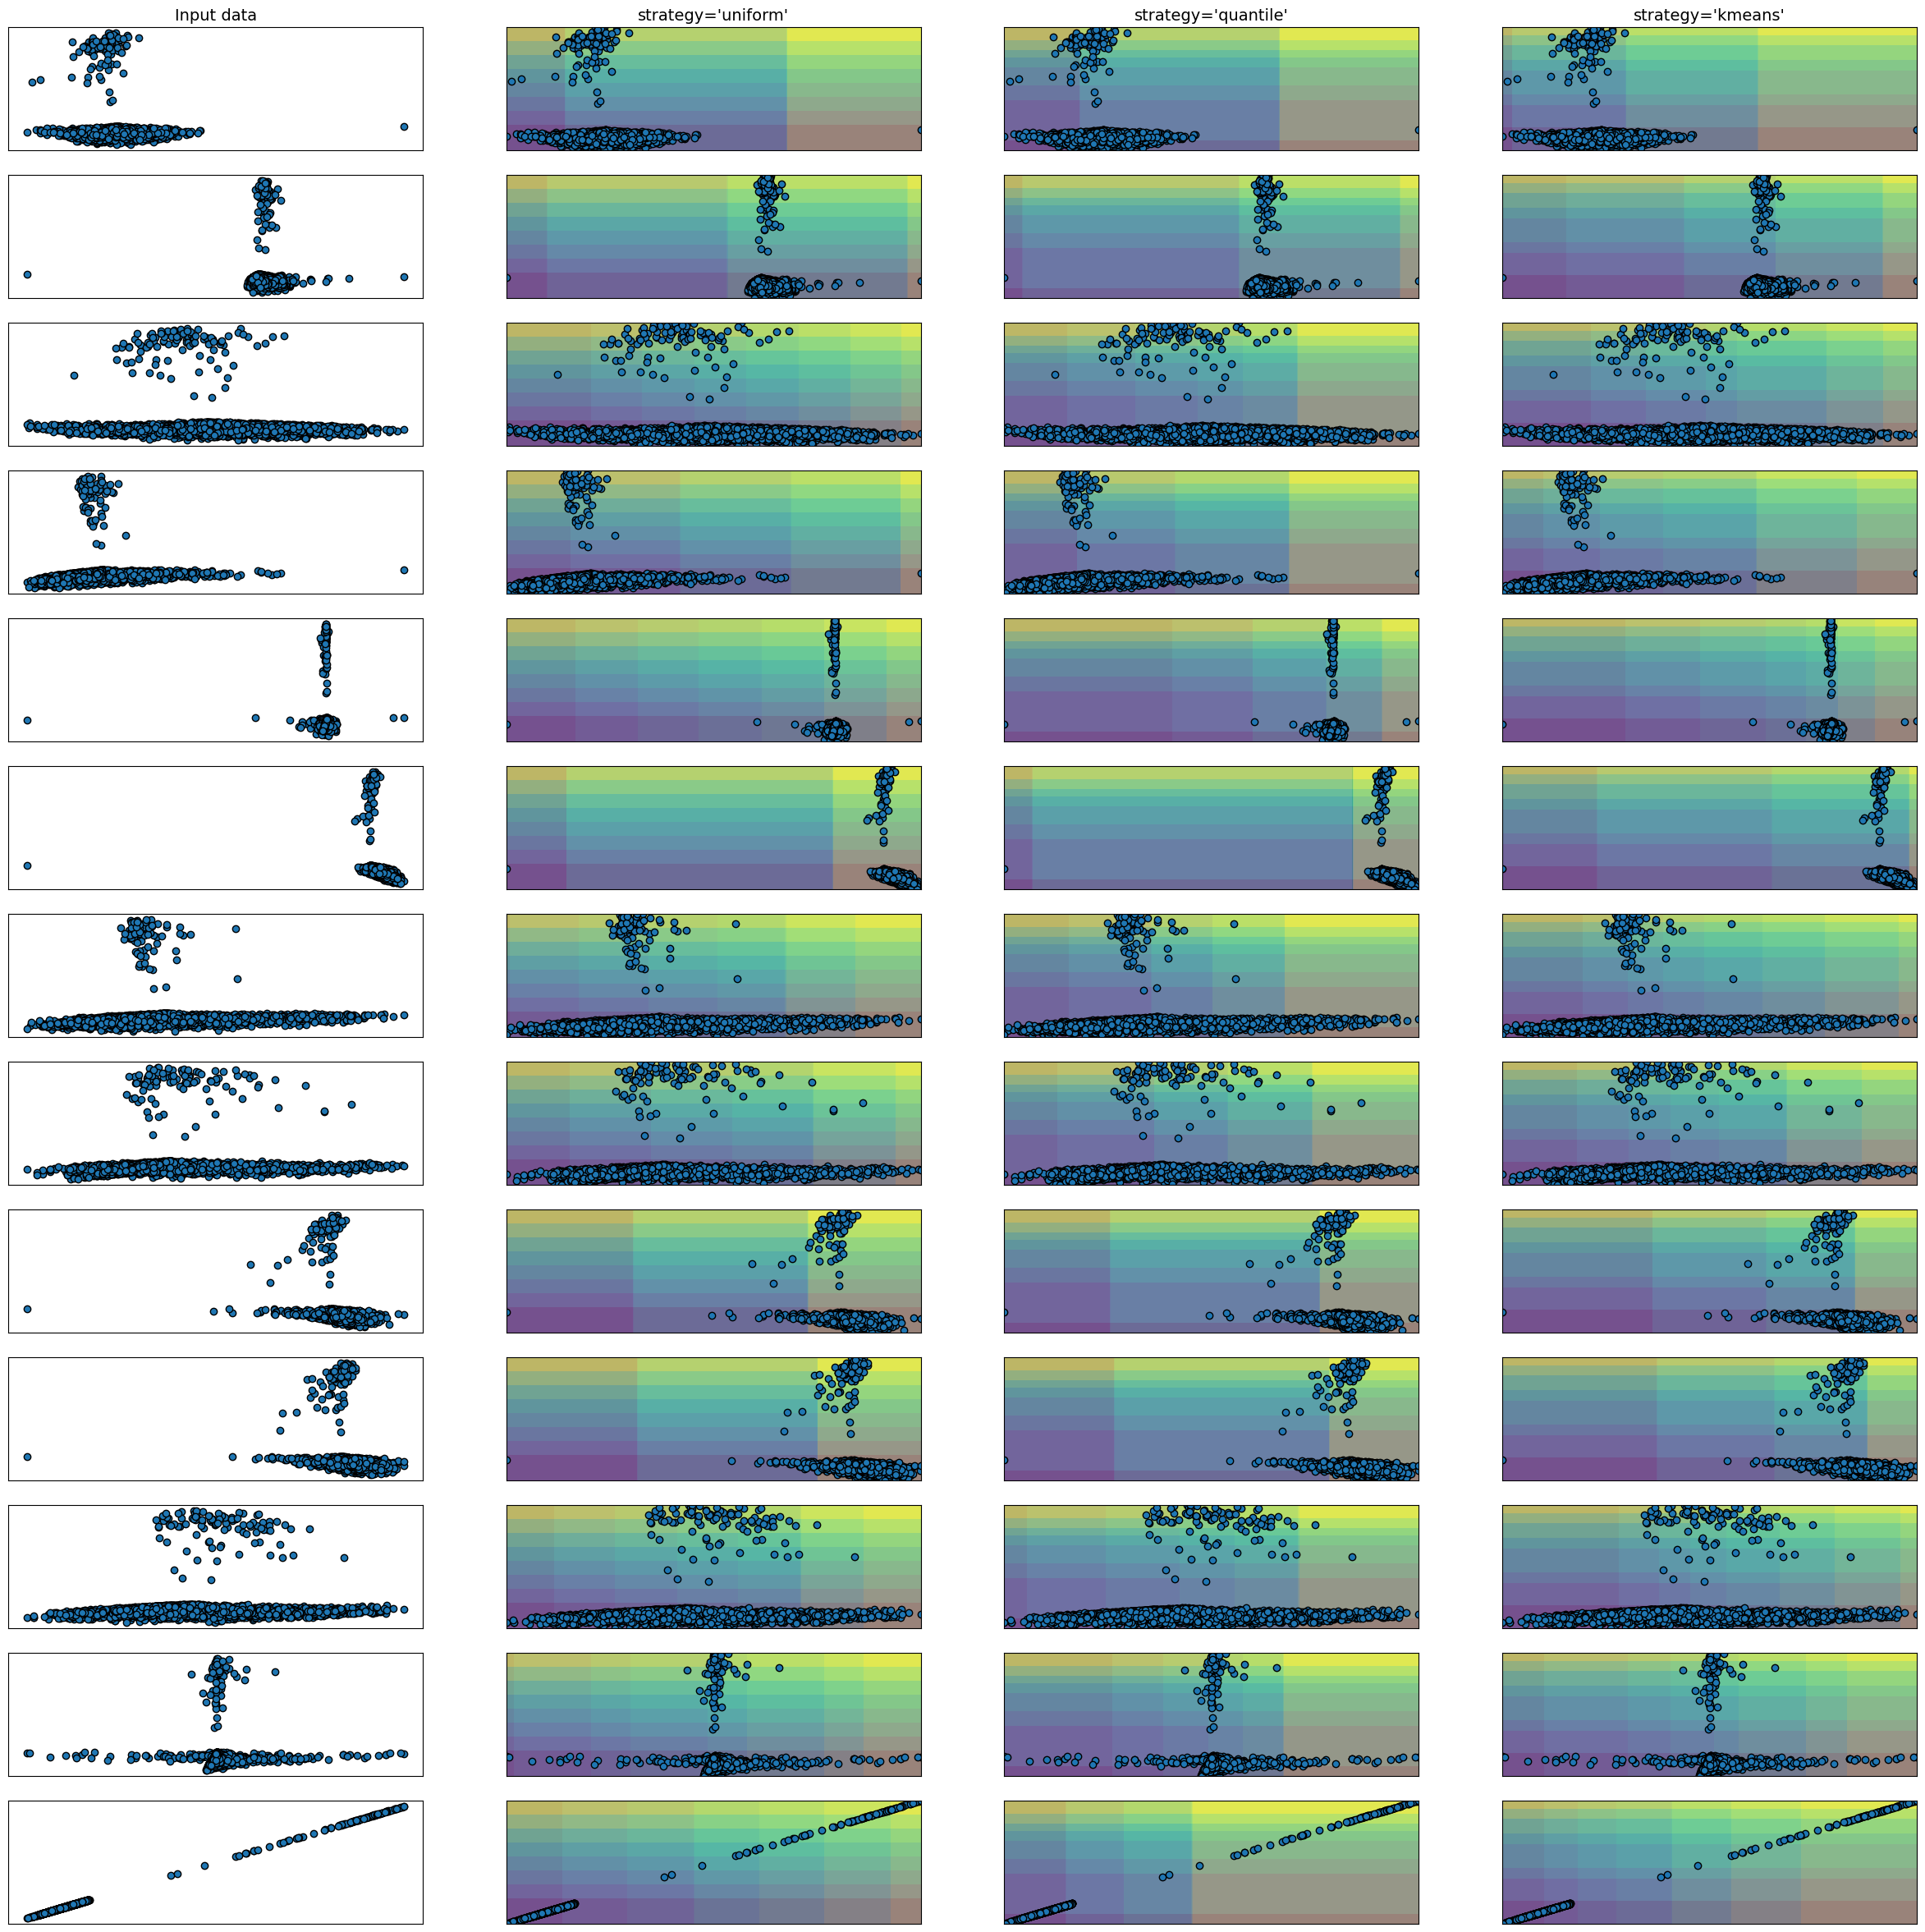

In [162]:
strategies = ["uniform", "quantile", "kmeans"]


keeping_attributes = [
    "X23:net profit / sales",
    "X1:net profit / total assets",
    "X7:EBIT / total assets",
    "X49:EBITDA (profit on operating activities - depreciation) / sales",
    "X9:sales / total assets",
    "X3:working capital / total assets",
    "X2:total liabilities / total assets",
    "X59:long-term liabilities / equity",
    "X6:retained earnings / total assets",
    "X4:current assets / short-term liabilities",
    "X51:short-term liabilities / total assets",
    "X8:book value of equity / total liabilities",
    "class"
]

keeping_attributes_2 = ['Attr1', 'Attr2', 'Attr3','Attr4',	'Attr5',	'Attr6',	'Attr7','Attr8','Attr9','Attr10','class']


for attribute in normalised_StandardisedData.columns.values.tolist():
    if attribute not in keeping_attributes:
        del normalised_StandardisedData[attribute]



figure = plt.figure(figsize=(30,30))
i = 1


for ds_cnt, col in enumerate(normalised_StandardisedData.columns.values.tolist()):
    ax = plt.subplot(len(normalised_StandardisedData.columns.values.tolist()), len(strategies) + 1, i)
    ax.scatter(normalised_StandardisedData[col], normalised_StandardisedData['class'], edgecolors="k")
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(normalised_StandardisedData[col].min(), normalised_StandardisedData[col].max(), 300),
        np.linspace(normalised_StandardisedData['class'].min(), normalised_StandardisedData['class'].max(), 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min()-0.25, xx.max()+0.25)
    ax.set_ylim(yy.min()-0.25, yy.max()+0.25)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.autoscale()

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = preprocessing.KBinsDiscretizer(
            n_bins=30, encode="ordinal", strategy=strategy, subsample=200_000
        )
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(normalised_StandardisedData.columns.values.tolist()), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=0.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=0.5)

        ax.scatter(normalised_StandardisedData[col], normalised_StandardisedData['class'], edgecolors="k")
        ax.set_xlim(xx.min()-0.25, xx.max()+0.25)
        ax.set_ylim(yy.min()-0.25, yy.max()+0.25)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.autoscale()
        if ds_cnt == 0:
            ax.set_title("strategy='%s'" % (strategy,), size=14)

        i += 1

plt.show()


Removal of Features

Selecting financial ratio features as per study dine by [Chen and Shimerda 1981] Kung H Chen and Thomas A Shimerda. An empirical analysis of useful
financial ratios. Financial management, pages 51–60, 1981.

Features I need: 

X23	net profit / sales \
X1	net profit / total assets \
X7	EBIT / total assets \
X49	EBITDA (profit on operating activities - depreciation) / sales \
X9	sales / total assets \
X3	working capital / total assets \
X2	total liabilities / total assets \
X59	long-term liabilities / equity \
X6	retained earnings / total assets \
X4	current assets / short-term liabilities \
X51	short-term liabilities / total assets \
X8	book value of equity / total liabilities \







In [6]:
#keeping_attributes = ["Attr1","Attr23","Attr7","Attr49","Attr9","Attr3","Attr2","Attr59","Attr6","Attr4","Attr51","Attr8","class"]
keeping_attributes = [
    "X23:net profit / sales",
    "X1:net profit / total assets",
    "X7:EBIT / total assets",
    "X49:EBITDA (profit on operating activities - depreciation) / sales",
    "X9:sales / total assets",
    "X3:working capital / total assets",
    "X2:total liabilities / total assets",
    "X59:long-term liabilities / equity",
    "X6:retained earnings / total assets",
    "X4:current assets / short-term liabilities",
    "X51:short-term liabilities / total assets",
    "X8:book value of equity / total liabilities",
    "class"
]

for attribute in PreprocessedData.columns.values.tolist():
    if attribute not in keeping_attributes:
        del PreprocessedData[attribute]

PreprocessedData

,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X23:net profit / sales,X49:EBITDA (profit on operating activities - depreciation) / sales,X51:short-term liabilities / total assets,X59:long-term liabilities / equity,class
0,C1,C20,C18,C1,C4,C20,C1,C1,C20,C20,C1,C14,0
1,C1,C20,C18,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
2,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
3,C1,C20,C18,C1,C4,C20,C4,C1,C20,C20,C1,C14,0
4,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,C1,C20,C18,C1,C4,C20,C1,C1,C20,C20,C2,C14,1
3027,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,1
3028,C1,C20,C16,C1,C4,C20,C1,C2,C20,C20,C2,C14,1
3029,C1,C20,C17,C1,C4,C20,C1,C1,C20,C20,C2,C14,1


Split Data into training and testing

In [30]:

from math import floor


processed_bankrupt = PreprocessedData.loc[PreprocessedData["class"] == '1']
processed_nonbunkrupt = PreprocessedData.loc[PreprocessedData["class"] == '0']
#results_bankrupt
#result_nonbunkrupt
processed_bankrupt_train = processed_bankrupt[0:(floor(0.75*processed_bankrupt.shape[0]))]
processed_nonbankrupt_train = processed_nonbunkrupt[0:(floor(0.75*processed_nonbunkrupt.shape[0]))]

processed_bankrupt_test = processed_bankrupt[(floor(0.75*processed_bankrupt.shape[0]))+1:processed_bankrupt.shape[0]]
processed_nonbankrupt_test = processed_nonbunkrupt[(floor(0.75*processed_nonbunkrupt.shape[0]))+1:processed_nonbunkrupt.shape[0]]

training_data = pd.concat([processed_nonbankrupt_train,processed_bankrupt_train])
training_data

testing_data = pd.concat([processed_nonbankrupt_test,processed_bankrupt_test])
testing_data


,X1:net profit / total assets,X2:total liabilities / total assets,X3:working capital / total assets,X4:current assets / short-term liabilities,X6:retained earnings / total assets,X7:EBIT / total assets,X8:book value of equity / total liabilities,X9:sales / total assets,X23:net profit / sales,X49:EBITDA (profit on operating activities - depreciation) / sales,X51:short-term liabilities / total assets,X59:long-term liabilities / equity,class
2197,C1,C20,C19,C1,C4,C20,C3,C1,C20,C20,C1,C14,0
2198,C1,C20,C18,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
2199,C1,C20,C19,C1,C4,C20,C4,C1,C20,C20,C1,C14,0
2200,C1,C20,C18,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
2201,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3026,C1,C20,C18,C1,C4,C20,C1,C1,C20,C20,C2,C14,1
3027,C1,C20,C19,C1,C4,C20,C2,C1,C20,C20,C1,C14,1
3028,C1,C20,C16,C1,C4,C20,C1,C2,C20,C20,C2,C14,1
3029,C1,C20,C17,C1,C4,C20,C1,C1,C20,C20,C2,C14,1
